# Spam or Ham Classifier Using NLP!

In [3]:
import nltk
from nltk.corpus import stopwords

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [7]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
lines=[lines for lines in open('smsspamcollection/SMSSpamCollection')]
print(len(lines))

5574


In [10]:
for i,mes in enumerate(lines):
    print(i,mes)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



1 ham	Ok lar... Joking wif u oni...



2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



3 ham	U dun say so early hor... U c already then say...



4 ham	Nah I don't think he goes to usf, he lives around here though



5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv



6 ham	Even my brother is not like to speak with me. They treat me like aids patent.



7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune



8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C



311 ham	Today is ACCEPT DAY..U Accept me as? Brother Sister Lover Dear1 Best1 Clos1 Lvblefrnd Jstfrnd Cutefrnd Lifpartnr Belovd Swtheart Bstfrnd No rply means enemy



312 spam	Think ur smart ? Win Â£200 this week in our weekly quiz, text PLAY to 85222 now!T&Cs WinnersClub PO BOX 84, M26 3UZ. 16+. GBP1.50/week



313 ham	He says he'll give me a call when his friend's got the money but that he's definitely buying before the end of the week



314 ham	Hi the way I was with u 2day, is the normal way&this is the real me. UR unique&I hope I know u 4 the rest of mylife. Hope u find wot was lost.



315 ham	You made my day. Do have a great day too.



316 ham	K.k:)advance happy pongal.



317 ham	Hmmm... Guess we can go 4 kb n power yoga... Haha, dunno we can tahan power yoga anot... Thk got lo oso, forgot liao...



318 ham	Not really dude, have no friends i'm afraid :(



319 spam	December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Fre

477 ham	Love you aathi..love u lot..



478 ham	Tension ah?what machi?any problem?



479 ham	K, can I pick up another 8th when you're done?



480 ham	When're you guys getting back? G said you were thinking about not staying for mcr



481 ham	Almost there, see u in a sec



482 ham	Yo carlos, a few friends are already asking me about you, you working at all this weekend?



483 ham	Watching tv lor...



484 ham	Thank you baby! I cant wait to taste the real thing...



485 ham	You should change your fb to jaykwon thuglyfe falconerf



486 ham	If we win its really no 1 side for long time.



487 spam	FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com



488 ham	Dear reached railway. What happen to you



489 ham	Depends on quality. If you want the type i sent boye, faded glory, then about 6. If you want ralphs maybe 2



490 ham	I think i've fixed it can you send a test message?



491 ham	S

810 ham	Ugh I don't wanna get out of bed. It's so warm.



811 ham	S:)s.nervous  &lt;#&gt; :)



812 ham	So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint



813 spam	Congratulations ur awarded either Â£500 of CD gift vouchers & Free entry 2 our Â£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16



814 ham	I borrow ur bag ok.



815 spam	U were outbid by simonwatson5120 on the Shinco DVD Plyr. 2 bid again, visit sms. ac/smsrewards 2 end bid notifications, reply END OUT



816 ham	Where's my boytoy? I miss you ... What happened?



817 ham	He has lots of used ones babe, but the model doesn't help. Youi have to bring it over and he'll match it up



818 ham	Also are you bringing galileo or dobby



819 ham	Then why you not responding



820 ham	"BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GETTIN ON WELL HUNNY!HOPE URE OK?TAKE CARE & IÂ’LLSPEAK 2U SOONLOTS OF LOVEME XXXX."



821 ham	Good afternoon starshine




1144 ham	And is there a way you can send shade's stuff to her. And she has been wonderful too.



1145 ham	Really... I tot ur paper ended long ago... But wat u copied jus now got use? U happy lar... I still haf 2 study :-(



1146 spam	Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832



1147 ham	Babe ? I lost you ... :-(



1148 ham	Ok... Help me ask if she's working tmr a not?



1149 ham	I'm not driving... Raining! Then i'll get caught at e mrt station lor.



1150 ham	Not a drop in the tank



1151 ham	(That said can you text him one more time?)



1152 ham	Sorry, I'll call later



1153 ham	Ok i go change also...



1154 spam	1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(Â£1.50p. m)



1155 ham	Did u find a sitter for kaitlyn? I was sick and slept all day yesterday.



1156 ham	Sorry man, accidentally left my phone on silent last n



1477 ham	I'm watching lotr w my sis dis aft. So u wan 2 meet me 4 dinner at nite a not?



1478 ham	Why you keeping me away like this



1479 ham	I think its far more than that but find out. Check google maps for a place from your dorm.



1480 ham	My trip was ok but quite tiring lor. Uni starts today but it's ok 4 me cos i'm not taking any modules but jus concentrating on my final yr project.



1481 ham	Have you always been saying welp?



1482 ham	I'm a guy, browsin is compulsory



1483 ham	Ok...



1484 ham	Purity of friendship between two is not about smiling after reading the forwarded message..Its about smiling just by seeing the name. Gud evng musthu



1485 ham	Sorry, I'll call later



1486 ham	(I should add that I don't really care and if you can't I can at least get this dude to fuck off but hey, your money if you want it)



1487 ham	Hello lover! How goes that new job? Are you there now? Are you happy? Do you think of me? I wake, my slave and send you a teasing kiss fro


1810 ham	Aight, I'll ask a few of my roommates



1811 ham	Now, whats your house # again ? And do you have any beer there ?



1812 ham	Do Ã¼ all wan 2 meet up n combine all the parts? How's da rest of da project going?



1813 ham	"Getting tickets 4 walsall tue 6 th march. My mate is getting me them on sat. ill pay my treat. Want 2 go. Txt bak .Terry"



1814 ham	Yes we are chatting too.



1815 ham	HI ITS JESS I DONT KNOW IF YOU ARE AT WORK BUT CALL ME WHEN U CAN IM AT HOME ALL EVE. XXX



1816 ham	Sian... Aft meeting supervisor got work 2 do liao... U working now?



1817 ham	Are you going to write ccna exam this week??



1818 ham	Well i will watch shrek in 3D!!B)



1819 ham	Am i that much dirty fellow?



1820 ham	Dunno dat's wat he told me. Ok lor...



1821 ham	I'll probably be by tomorrow (or even later tonight if something's going on)



1822 ham	I couldn't say no as he is a dying man and I feel sad for him so I will go and I just wanted you to know I would probably be gone 

2143 ham	You see the requirements please



2144 ham	You stayin out of trouble stranger!!saw Dave the other day heÂ’s sorted now!still with me bloke when u gona get a girl MR!ur mum still Thinks we will get 2GETHA! 



2145 spam	FreeMsg: Hey - I'm Buffy. 25 and love to satisfy men. Home alone feeling randy. Reply 2 C my PIX! QlynnBV Help08700621170150p a msg Send stop to stop txts



2146 spam	Sunshine Hols. To claim ur med holiday send a stamped self address envelope to Drinks on Us UK, PO Box 113, Bray, Wicklow, Eire. Quiz Starts Saturday! Unsub Stop



2147 ham	So can collect ur laptop?



2148 ham	Ok. Can be later showing around 8-8:30 if you want + cld have drink before. Wld prefer not to spend money on nosh if you don't mind, as doing that nxt wk.



2149 ham	I will once i get home



2150 ham	Waaaat?? Lololo ok next time then!



2151 ham	The table's occupied, I'm waiting by the tree



2152 ham	I surely dont forgot to come:)i will always be in touch in with you:-)



2153 ham	H

2413 spam	I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.



2414 ham	Lol please do. Actually send a pic of yourself right now. I wanna see. Pose with a comb and hair dryer or something.



2415 ham	O was not into fps then.



2416 ham	Huh means computational science... Y they like dat one push here n there...



2417 ham	Could you not read me, my Love ? I answered you



2418 ham	Oh... Lk tt den we take e one tt ends at cine lor... Dun wan yogasana oso can... 



2419 ham	Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.



2420 spam	SMS SERVICES For your inclusive text credits pls gotto www.comuk.net login 3qxj9 unsubscribe with STOP no extra charge help 08702840625 comuk.220cm2 9AE



2421 ham	Oic... Then better quickly go bathe n settle down...



2422 ham	Err... Cud do. I'm going to  at 8pm. I haven't got a



2643 ham	They can try! They can get lost, in fact. Tee hee



2644 ham	Hi! You just spoke to MANEESHA V. We'd like to know if you were satisfied with the experience. Reply Toll Free with Yes or No.



2645 ham	My friends use to call the same.



2646 ham	Sorry, I'll call later



2647 ham	Em, its olowoyey@ usc.edu have a great time in argentina. Not sad about secretary, everything is a blessing



2648 ham	It,,s a taxt massage....tie-pos argh ok! Lool!



2649 ham	Hi, can i please get a  &lt;#&gt;  dollar loan from you. I.ll pay you back by mid february. Pls.



2650 ham	You might want to pull out more just in case and just plan on not spending it if you can, I don't have much confidence in derek and taylor's money management



2651 ham	Do you like shaking your booty on the dance floor?



2652 ham	Text me when you get off, don't call, my phones having problems



2653 ham	No need for the drug anymore.



2654 ham	Sorry da:)i was thought of calling you lot of times:)lil busy.i will 


2976 ham	Don't worry, * is easy once have ingredients!



2977 ham	I love u 2 my little pocy bell I am sorry but I love u



2978 ham	Ok omw now, you at castor?



2979 ham	Yar lor... Keep raining non stop... Or u wan 2 go elsewhere?



2980 spam	Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth or DVD! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/4QF2



2981 ham	What u mean u almost done? Done wif sleeping? But i tot u going to take a nap.. Yup i send her liao so i'm picking her up at ard 4 smth lor..



2982 ham	7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear



2983 ham	Tonight? Yeah, I'd be down for that



2984 ham	What should i eat fo lunch senor



2985 ham	He said that he had a right giggle when he saw u again! You would possibly be the first person2die from NVQ, but think how much you could for! 



2986 ham	No break time

3309 ham	But i'm surprised she still can guess right lor...



3310 ham	Okie Ã¼ wan meet at bishan? Cos me at bishan now. I'm not driving today.



3311 ham	Oh ho. Is this the first time u use these type of words



3312 ham	HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE? IJUST TALKED TO YOUR MUM ALL MORNING! I HAD A REALLY GOOD TIME LAST NIGHT IM GOIN OUT SOON BUT CALL ME IF U CAN



3313 ham	I know you are serving. I mean what are you doing now.



3314 ham	Huh... Hyde park not in mel ah, opps, got confused... Anyway, if tt's e best choice den we juz have to take it...



3315 ham	Oh gei. That happend to me in tron. Maybe ill dl it in 3d when its out



3316 spam	FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com



3317 ham	I know girls always safe and selfish know i got it pa. Thank you. good night.



3318 ham	No worries, hope photo shoot went well. have a spiffing fun at workage. 



33

3642 spam	You can stop further club tones by replying "STOP MIX" See my-tone.com/enjoy. html for terms. Club tones cost GBP4.50/week. MFL, PO Box 1146 MK45 2WT (2/3)



3643 ham	My house here e sky quite dark liao... If raining then got excuse not 2 run already rite... Hee...



3644 ham	Sorry, left phone upstairs. OK, might be hectic but would be all my birds with one fell swoop. It's a date.



3645 ham	* Thought I didn't see you.



3646 spam	wamma get laid?want real doggin locations sent direct to your mobile? join the UKs largest dogging network. txt dogs to 69696 now!nyt. ec2a. 3lp Â£1.50/msg.



3647 ham	Carlos says we can pick up from him later so yeah we're set



3648 ham	Hey babe, my friend had to cancel, still up for a visit ?



3649 ham	As per your request 'Maangalyam (Alaipayuthe)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune



3650 ham	Hmm ill have to think about it... ok you're forgiven! =D



3651 ham	We are hoping to get 

3975 ham	Roger that. Weâ€˜re probably going to rem in about 20



3976 ham	do u think that any girl will propose u today by seing ur bloody funky shit fucking face...............asssssholeeee................



3977 ham	I wish u were here. I feel so alone



3978 spam	Great NEW Offer - DOUBLE Mins & DOUBLE Txt on best Orange tariffs AND get latest camera phones 4 FREE! Call MobileUpd8 free on 08000839402 NOW! or 2stoptxt T&Cs



3979 ham	Reason is if the team budget is available at last they buy the unsold players for at base rate..



3980 ham	CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES



3981 spam	ringtoneking 84484



3982 ham	Huh i cant thk of more oredi how many pages do we have?



3983 ham	His frens go then he in lor. Not alone wif my mum n sis lor.



3984 ham	Nationwide auto centre (or something like that) on Newport road. I liked them there



3985 ham	Hey, I missed you tm of last night as my phone was on the charge ... *smiles* ... I am meeting




4309 ham	Ha ha - had popped down to the loo when you hello-ed me. Hello!



4310 ham	He dint tell anything. He is angry on me that why you told to abi.



4311 spam	Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058091854 NOW all will be revealed. PO BOX385 M6 6WU



4312 ham	It so happens that there r 2waxsto do wat you want. She can come and ill get her medical insurance. And she'll be able to deliver and have basic care. I'm currently shopping for the right medical insurance for her. So just give me til friday morning. Thats when i.ll see the major person that can guide me to the right insurance.



4313 ham	I keep ten rs in my shelf:) buy two egg.



4314 ham	I wasn't well babe, i have swollen glands at my throat ... What did you end up doing ?



4315 ham	Is ur changes 2 da report big? Cos i've already made changes 2 da previous report.



4316 ham	Captain is in our room:)



4317 ham	I can't speak, bcaz mobile have problem. I can listen you b



4642 ham	Havent.



4643 spam	You are being ripped off! Get your mobile content from www.clubmoby.com call 08717509990 poly/true/Pix/Ringtones/Games six downloads for only 3



4644 ham	Sorry i din lock my keypad.



4645 ham	Did u got that persons story



4646 ham	Are you planning to come chennai?



4647 spam	We tried to contact you re your reply to our offer of a Video Phone 750 anytime any network mins Half Price Line Rental Camcorder Reply or call 08000930705



4648 ham	God created gap btwn ur fingers so dat sum1 vry special will fill those gaps by holding ur hands.. Now plz dont ask y he created so much gap between legs !!!



4649 ham	We are okay. Going to sleep now. Later



4650 ham	Please protect yourself from e-threats. SIB never asks for sensitive information like Passwords,ATM/SMS PIN thru email. Never share your password with anybody.



4651 ham	Finally it has happened..! Aftr decades..! BEER is now cheaper than PETROL! The goverment expects us to "DRINK". . . But do


4975 ham	Aiyo u so poor thing... Then u dun wan 2 eat? U bathe already?



4976 ham	Yar... I tot u knew dis would happen long ago already.



4977 ham	You are gorgeous! keep those pix cumming :) thank you!



4978 ham	A boy was late 2 home. His father: "POWER OF FRNDSHIP"



4979 ham	JADE ITS PAUL. Y DIDNÂ’T U TXT ME? DO U REMEMBER ME FROM BARMED? I WANT 2 TALK 2 U! TXT ME



4980 ham	Spending new years with my brother and his family. Lets plan to meet next week. Are you ready to be spoiled? :)



4981 ham	So what u doing today?



4982 ham	I said its okay. Sorry



4983 ham	Slept? I thinkThis time ( &lt;#&gt;  pm) is not dangerous



4984 ham	Networking job is there.



4985 spam	goldviking (29/M) is inviting you to be his friend. Reply YES-762 or NO-762 See him: www.SMS.ac/u/goldviking STOP? Send STOP FRND to 62468



4986 ham	Dont let studying stress you out. L8r.



4987 ham	That's y u haf 2 keep me busy...



4988 ham	No rushing. I'm not working. I'm in school so if we rush we go

5308 ham	Ill be at yours in about 3 mins but look out for me



5309 ham	What you did in  leave.



5310 ham	I'm coming back on Thursday. Yay. Is it gonna be ok to get the money. Cheers. Oh yeah and how are you. Everything alright. Hows school. Or do you call it work now



5311 ham	Jolly good! By the way,  will give u tickets for sat eve 7.30. Speak before then x



5312 ham	yeah, that's what I was thinking



5313 ham	K.k:)i'm going to tirunelvali this week to see my uncle ..i already spend the amount by taking dress .so only i want money.i will give it on feb 1



5314 ham	Here got ur favorite oyster... N got my favorite sashimi... Ok lar i dun say already... Wait ur stomach start rumbling...



5315 ham	My sister going to earn more than me da.



5316 spam	Get the official ENGLAND poly ringtone or colour flag on yer mobile for tonights game! Text TONE or FLAG to 84199. Optout txt ENG STOP Box39822 W111WX Â£1.50



5317 ham	Hahaha..use your brain dear



5318 ham	Jus finish watching

In [11]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
#Let's Create a new Column Based on the length of the Messages
df['length']=df['message'].apply(len)

In [13]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011D4FC2EDD8>,
      dtype=object)

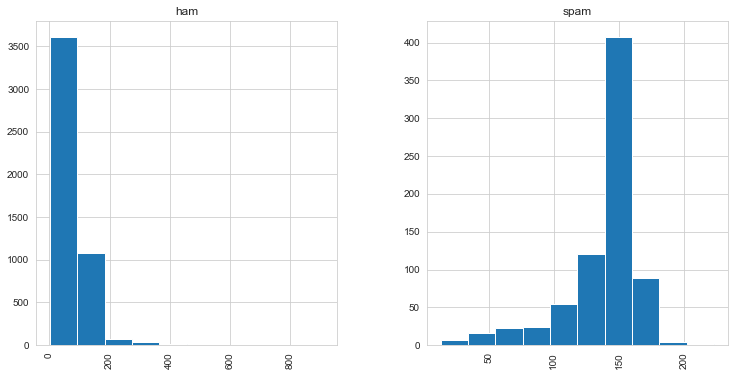

In [15]:
#lets perform some viusalizations on our DataFrame
df.hist(column='length',by='label',figsize=(12,6))

In [16]:
#The Longest Message in our Data set is of Length 910 insane May be some Love letter! Who know's!1
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
#opps! it is Lover Letter lol!!
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Text Preprocessing

In [18]:
import string
#Punctuation are not Much useful interms of training a model because it doesn't convey any meaning!!
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
#let's Remove Punctuations
stop_wrds=[i for i in df['message'][0] if i not in string.punctuation]

In [20]:
stop_wrds="".join(stop_wrds)

In [21]:
stop_wrds

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [28]:
#Punctutations are removed Now Let's Remove Stop Words because those stop words are not gonna convey Any Meaning!!s
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
#Lets do it For one message
stop_wrds=[wrds for wrds in stop_wrds.split() if wrds.lower() not in stopwords.words('english') ]

In [32]:
" ".join(stop_wrds)

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [42]:
#Now Lets Apply this to to out entire Data
def text_process(mess):
    #Removing Punctuations
    non_punc=[ i for i in mess if i not in string.punctuation]
    non_punc="".join(non_punc)
    #Removing Stop Words
    return([wrd for wrd in non_punc.split() if wrd not in stopwords.words('english')])

In [43]:
proc_mes=df['message'].apply(text_process)

In [45]:
proc_mes.shape

(5572,)

# Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(analyzer=text_process)
vect_data=vect.fit_transform(df['message'])

In [52]:
vect_data.shape

(5572, 11617)

Contains Large no.of Vector in which most of the data is of 0's

Lets Claculate TF-IDF values..!!

### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*,
**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf=tfidf_transformer.fit_transform(vect_data)
print(tfidf)

  (0, 2113)	0.24203960256420654
  (0, 7747)	0.3125385626069454
  (0, 9109)	0.2470465237683799
  (0, 5961)	0.24984711892976422
  (0, 1133)	0.28828620163084173
  (0, 5410)	0.26870593862526665
  (0, 8528)	0.1704686929219563
  (0, 7129)	0.1834692413608692
  (0, 11355)	0.2302668559241891
  (0, 7860)	0.264033840654738
  (0, 6409)	0.189155577328428
  (0, 5409)	0.29835184088197164
  (0, 1521)	0.3125385626069454
  (0, 7098)	0.15158474664662352
  (0, 4845)	0.3125385626069454
  (0, 11157)	0.1907342854506148
  (1, 3177)	0.2911995411244838
  (1, 7893)	0.3767401070812794
  (1, 2535)	0.561988811929381
  (1, 11264)	0.40061560982443056
  (1, 10890)	0.2063637481323008
  (1, 8782)	0.5043405901305854
  (2, 1993)	0.15265817292257164
  (2, 6523)	0.3479046545895281
  (2, 423)	0.09639170919810958
  :	:
  (5568, 6546)	0.5173794122855936
  (5569, 8444)	0.4328299709057074
  (5569, 3349)	0.520467167163554
  (5569, 3852)	0.520467167163554
  (5569, 10391)	0.520467167163554
  (5570, 2362)	0.10236715490401903
  (5570

Now let's Convert the Categorical Value to Numerical Value!1

In [66]:
y=pd.get_dummies(df['label'],drop_first=True)
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [67]:
X=tfidf

# Now Let's Split the data and Train the Model

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train,y_train)

C:\Users\Appaswamy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
pred=spam_detect_model.predict(X_test)

In [76]:
spam_detect_model.score(X_train,y_train)

0.9691936780069649

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1593
          1       1.00      0.71      0.83       246

avg / total       0.96      0.96      0.96      1839



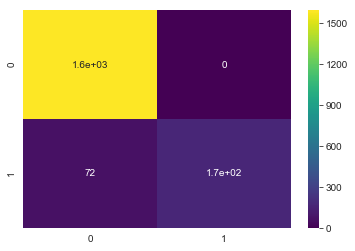

In [83]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='viridis')

Great!!Let's do this entire Process Using Pipeline Which Does entire Process Automatically!!

In [86]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['message'], df['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [87]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [88]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000011D50287BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [89]:
predictions = pipeline.predict(msg_test)

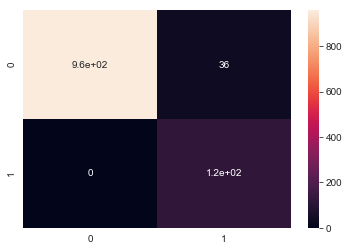

In [92]:
sns.heatmap(confusion_matrix(predictions,label_test),annot=True)

In [93]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98       994
       spam       0.77      1.00      0.87       121

avg / total       0.98      0.97      0.97      1115



# Pipeline

Pipeline is one of the easiet way to define our workflow it does all the work that need to be done in order.Scikit does all the process according to the workflow!!

# Thank You!!